<a href="https://colab.research.google.com/github/EdwardPlata/66daysofdata_2021/blob/main/intro_to_nlp_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Google Colab

Colab is essentially Google's way of hosting a [jupyter notebook](https://jupyter.org/). A very popular tool to use as a data scientist!

It allows us to write code, documentation, and output visuals all in one place.

To be able to and edit the code in this workshop. Please make a copy for yourself

`file > save a copy in drive`

This should open a new tab with your own copy of this notebook. It can take a minute to load.

Colab comes with a lot of great data science libraries pre-installed. 

Colab also gives you some options for running complicated computations such as training deep learning model. To see access those options:

`Runtime > change runtime type` Select `GPU`, `TPU`, or `None`

We don't need to change anything for this workshop, but its a great resource if you start learning deep learning and don't have a powerful GPU at home. 

# Introduction to NLP

# What is NLP?

Natural Language Processing is the field of leveraging computers to 
understand, analyze, manipulate, and even generate human language.

## Why do we need NLP?

> We can harness the untapped potential of unstructured text. 

> Whereas traditional databases and datasets contain highly structured data in row/columnar format, text is highly irregular and traditional approaches would not



## High-Level Capabilities:

*   Content Categorization
*   Document Summarization
*   Machine Translation
*   Sentiment Analysis
*   Speech-to-text and Text-to-speech
*   Topic Modeling


## How do we prepare the text for processing?

Steps of text cleaning:

1.   Acquire the text
2.   Remove punctuation
3.   Tokenize
4.   Remove stopwords
5.   Stemming or Lemmatization

After the text is clean we can follow up by vectorizing the data:
1.   Bag-of-words
2.   TF-IDF


## We can walk through some simple examples to start

We'll use an example sentence to then take through the text cleaning and vectorization process.

Example:

> "Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data.[1][2] Data science is related to data mining, machine learning and big data."


In [23]:
print("Hello world")

Hello world


# Heading

In [24]:
example = "Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data.[1][2] Data science is related to data mining, machine learning and big data."

# lowercase it all
lower = example.lower()

In [25]:
print(lower)

data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data.[1][2] data science is related to data mining, machine learning and big data.


What is NLP?

1. Used for sentiment analysis 
2. Subfield of AI
3. Language convertion
4.Using computer to simulate human language (BERT)
5. Harnest the untapped potential of human text
6. 90% of the data is unstrsuctured and mostly text
7. Highly irregular and older method smay not work.
8. For news articles we can check what it belongs to? Sports, Weather, Finances etc
9. Even summarice chapters in a book
10. Machine translation
11. Not everything has a topic so labeling may still be difficult

Regular Expressions are a powerful way to manipulate text. [Here](https://www.dataquest.io/blog/regex-cheatsheet/) is an additional resource on some of the most common uses.

In [26]:
# We can use the re library to create regular expressions to parse text
import re
import string

# string.punctuation contains most traditional punctuation marks
print(string.punctuation)
pattern = r"[{}]".format(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
no_punctuation = re.sub(pattern, " ", lower)
print(no_punctuation)

data science is an inter disciplinary field that uses scientific methods  processes  algorithms and systems to extract knowledge and insights from many structural and unstructured data  1  2  data science is related to data mining  machine learning and big data 


In [28]:
no_nums = re.sub(r"[\d+]", " ", no_punctuation)

print(no_nums)

data science is an inter disciplinary field that uses scientific methods  processes  algorithms and systems to extract knowledge and insights from many structural and unstructured data        data science is related to data mining  machine learning and big data 


In [29]:
# Next step is to tokenize, or split the data into individual chunks
tokens = no_nums.split(' ')

# Now let's inspect it
tokens[0:20]

['data',
 'science',
 'is',
 'an',
 'inter',
 'disciplinary',
 'field',
 'that',
 'uses',
 'scientific',
 'methods',
 '',
 'processes',
 '',
 'algorithms',
 'and',
 'systems',
 'to',
 'extract',
 'knowledge']

In [30]:
# remove the blanks
no_blanks = []

for token in tokens:
  if token != '':
    no_blanks.append(token)

In [31]:
no_blanks[0:20]

['data',
 'science',
 'is',
 'an',
 'inter',
 'disciplinary',
 'field',
 'that',
 'uses',
 'scientific',
 'methods',
 'processes',
 'algorithms',
 'and',
 'systems',
 'to',
 'extract',
 'knowledge',
 'and',
 'insights']

In [32]:
# We have to download the stopwords prior to use with NLTK (if it is the first
# time that you've done this on a new computer)
import nltk
nltk.download('stopwords')

# So not we can move onto stopword removal
from nltk.corpus import stopwords

# What do the stopwords look like?
print(stopwords.words('english')[0:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [33]:
# We'll remove the punctuation in stopwords as well
stops_nopunct = [re.sub(pattern, "", stop) for stop in stopwords.words('english')]

print(stops_nopunct[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre']


In [34]:
def remove_stopwords(words):
  no_stops = []
  for word in words:
    if word not in stops_nopunct:
      no_stops.append(word)
  return no_stops

In [35]:
no_stops = remove_stopwords(no_blanks)
no_stops

['data',
 'science',
 'inter',
 'disciplinary',
 'field',
 'uses',
 'scientific',
 'methods',
 'processes',
 'algorithms',
 'systems',
 'extract',
 'knowledge',
 'insights',
 'many',
 'structural',
 'unstructured',
 'data',
 'data',
 'science',
 'related',
 'data',
 'mining',
 'machine',
 'learning',
 'big',
 'data']

Additional Information on [PorterStemmer](https://tartarus.org/martin/PorterStemmer/) and [SnowballStemmer](http://snowball.tartarus.org/algorithms/english/stemmer.html)

---



In [36]:
# Must also download WordNet on NLTK (first time)
nltk.download('wordnet')

# Stemming vs Lemmatization
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Stemmers
ps = PorterStemmer()
ls = LancasterStemmer()
ss = SnowballStemmer('english')

# Lemmatizer
wn = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [37]:
# Let's try a word that has different tenses
test_words = ['waited', 'waits', 'waiting']

for word in test_words:
  print(ps.stem(word), ls.stem(word), ss.stem(word), wn.lemmatize(word))

wait wait wait waited
wait wait wait wait
wait wait wait waiting


Try each type of stemmer and lemmatizer on any words that you can think of and observe how they change!

In [38]:
# Your code here
# Let's try a word that has different tenses
test_words = ['lemmatizer', 'stemmer']

for word in test_words:
  print(ps.stem(word), ls.stem(word), ss.stem(word), wn.lemmatize(word))

lemmat lem lemmat lemmatizer
stemmer stem stemmer stemmer


In [39]:
import pandas as pd

# We'll create an empty list to store the outputs so we can compare them easily
diff_forms = []

# Process every word with every type of stemmer and also lemma
for word in no_blanks:
  diff_forms.append([ps.stem(word), ls.stem(word), ss.stem(word), 
                          wn.lemmatize(word)])

processer_names = ['Porter', 'Lancaster', 'Snowball', 'WordNet_Lemma']

diff_stems_df = pd.DataFrame(diff_forms, columns=processer_names)
diff_stems_df.head(10)

,Porter,Lancaster,Snowball,WordNet_Lemma
0,data,dat,data,data
1,scienc,sci,scienc,science
2,is,is,is,is
3,an,an,an,an
4,inter,int,inter,inter
5,disciplinari,disciplin,disciplinari,disciplinary
6,field,field,field,field
7,that,that,that,that
8,use,us,use,us
9,scientif,sci,scientif,scientific


Resource on [List Comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)

In [40]:
# The Vectorizers work better with string forms, we rejoin the words
stemmed_text = [' '.join([ps.stem(word) for word in no_stops])]

In [41]:
stemmed_text

['data scienc inter disciplinari field use scientif method process algorithm system extract knowledg insight mani structur unstructur data data scienc relat data mine machin learn big data']

In [42]:
# Now we can move to vectorize the processed text

# Necessary imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [43]:
bow = cv.fit_transform(stemmed_text)
bow

<1x22 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

But what does this output look like?

In [44]:
print(bow.todense())

[[1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]]


In [45]:
print(cv.get_feature_names())

['algorithm', 'big', 'data', 'disciplinari', 'extract', 'field', 'insight', 'inter', 'knowledg', 'learn', 'machin', 'mani', 'method', 'mine', 'process', 'relat', 'scienc', 'scientif', 'structur', 'system', 'unstructur', 'use']


In [46]:
pd.DataFrame(bow.todense(), columns=cv.get_feature_names())

,algorithm,big,data,disciplinari,extract,field,insight,inter,knowledg,learn,machin,mani,method,mine,process,relat,scienc,scientif,structur,system,unstructur,use
0,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1


$tfidf(t, d, D) = tf(t,d) \cdot idf(t,D)$

In [47]:
tfidf_out = tfidf.fit_transform(stemmed_text)
tfidf_out.toarray()

array([[0.14285714, 0.14285714, 0.71428571, 0.14285714, 0.14285714,
        0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.28571429, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714]])

### Now for a real dataset

In [48]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [49]:
# We'll load the IMDB Reviews dataset via Tensorflow's dataset library
imdb = tfds.load('imdb_reviews', split='train', shuffle_files=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNR5HZY/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNR5HZY/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNR5HZY/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [50]:
# This cell may take a moment to run...
df = tfds.as_dataframe(imdb)

In [51]:
df = pd.DataFrame(df)

In [52]:
df.head()

,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


In [53]:
# We'll convert the text column to text from bytes
df.text = df.text.apply(bytes.decode)

In [54]:
# How many positive reviews vs negative reviews are there?
df.label.value_counts()

1    12500
0    12500
Name: label, dtype: int64

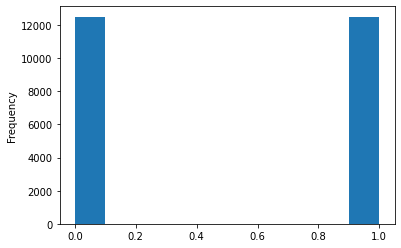

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

df.label.plot(kind='hist');

In [56]:
df.head()

,label,text
0,0,This was an absolutely terrible movie. Don't b...
1,0,"I have been known to fall asleep during films,..."
2,0,Mann photographs the Alberta Rocky Mountains i...
3,1,This is the kind of film for a snowy Sunday af...
4,1,"As others have mentioned, all the women that g..."


In [57]:
type(df)

pandas.core.frame.DataFrame

In [58]:
# What does an example review actually look like?
df.text[0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [59]:
df.columns

Index(['label', 'text'], dtype='object')

(array([8.000e+01, 9.140e+02, 1.122e+03, 1.209e+03, 3.959e+03, 3.321e+03,
        2.366e+03, 1.866e+03, 1.381e+03, 1.208e+03, 9.670e+02, 8.070e+02,
        6.760e+02, 6.450e+02, 5.490e+02, 4.120e+02, 4.090e+02, 3.680e+02,
        2.940e+02, 2.550e+02, 2.420e+02, 2.210e+02, 1.960e+02, 1.550e+02,
        1.590e+02, 1.400e+02, 1.080e+02, 9.600e+01, 8.800e+01, 8.600e+01,
        1.000e+02, 6.400e+01, 5.600e+01, 6.000e+01, 4.500e+01, 5.600e+01,
        3.700e+01, 4.100e+01, 3.800e+01, 3.800e+01, 4.200e+01, 3.700e+01,
        3.500e+01, 1.700e+01, 7.000e+00, 5.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

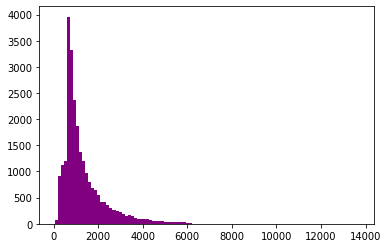

In [63]:
# Distribution of review length???
# No real great way of doign this but we can count num of spaces within reviews as a proxy for number of words.
# Do long reviews tend to be more possitive ( Or more prone to predict correctly) 
import matplotlib.pyplot as plt
df.text.apply(lambda x: len(x))
plt.hist(df.text.apply(lambda x: len(x)),color = 'purple',bins=100)

,label,text
0,0,This was an absolutely terrible movie. Don't b...
1,0,"I have been known to fall asleep during films,..."
2,0,Mann photographs the Alberta Rocky Mountains i...
3,1,This is the kind of film for a snowy Sunday af...
4,1,"As others have mentioned, all the women that g..."


We can use cross validation later on to provide more robustness
1. K folds for example 

In [66]:
# Fortunately, there exist many libraries that can help us do all 
# the data cleaning we need to in a couple simple steps

In [65]:
import gensim

from gensim import parsing

In [67]:
# This may take a few seconds to run...
processed_text = parsing.preprocess_documents(df.text)

In [68]:
processed_text[0][0:10]

['absolut',
 'terribl',
 'movi',
 'lure',
 'christoph',
 'walken',
 'michael',
 'ironsid',
 'great',
 'actor']

In [73]:
list(zip(df.text[0].split()[0:10],processed_text[0][0:10]))

[('This', 'absolut'),
 ('was', 'terribl'),
 ('an', 'movi'),
 ('absolutely', 'lure'),
 ('terrible', 'christoph'),
 ('movie.', 'walken'),
 ("Don't", 'michael'),
 ('be', 'ironsid'),
 ('lured', 'great'),
 ('in', 'actor')]

In [74]:
df['cleaned_text'] = [' '.join(word) for word in processed_text]

In [75]:
df.head(3)

,label,text,cleaned_text
0,0,This was an absolutely terrible movie. Don't b...,absolut terribl movi lure christoph walken mic...
1,0,"I have been known to fall asleep during films,...",known fall asleep film usual combin thing incl...
2,0,Mann photographs the Alberta Rocky Mountains i...,mann photograph alberta rocki mountain superb ...


Notice how we have the word asleep, now we have to analyse to see if this has anything to do with negative reviews (most likely)

In [77]:
from sklearn.model_selection import train_test_split

# Now we will split our dataset into training and test sets
text_train, text_test, y_train, y_test = train_test_split(df.drop(['label', 'text'], axis=1),
                                                          df['label'], stratify=df['label'],
                                                          random_state=2020)

We can have k-fold cross validation (80/20) we can have 5 folds where we chose 5 different pieces of the data set in 5 chunks and alternate which one of those 5 we will use as a test set to test across the whole dataset. 
OR a trade-test split or k fold to 80% of my training data so that we can evaluate our performance until we settle on a model which can then be used to test out the whole
BUT at the end of the day we'll need high quality data.

In [78]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [79]:
# We fit on only the training set
tfidf.fit(text_train.cleaned_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

Most machine learning models will requrie a matrix like format

In [80]:
# And transform the text using our fit transformer
tfidf_out = tfidf.transform(text_train.cleaned_text)

In [81]:
tfidf_out

<18750x44937 sparse matrix of type '<class 'numpy.float64'>'
	with 1534342 stored elements in Compressed Sparse Row format>

In [82]:
from sklearn.linear_model import LogisticRegression

import numpy as np

# Here we create a logistic regression model that can be used for binary predictions
lr = LogisticRegression()
lr.fit(tfidf_out, list(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
from sklearn import metrics

# We use the same vectorizer on the test set to simulate so we don't include
# words that were not in our training dataset

test_tfidf_out = tfidf.transform(text_test.cleaned_text)

# Then we use that output matrix and store the logistic regression model's
# predictions

predicted = lr.predict(test_tfidf_out)

In [88]:
print(test_tfidf_out.shape)
print(tfidf_out.shape, test_tfidf_out.shape)

(6250, 44937)
(18750, 44937) (6250, 44937)


Number of columns in test and train MUST MATCH

Our features are our words in the TFIDF matrix

1. HOw close to 1 would the model be before it seems it was over performing?
- stemming and lemitization really gave us some reduction
- We may want to shrink or vocab to 25k words
- How can Emojis be used? THey seem to contain a lot of information in a singel token
- CHeck for data set that has some available

Learn all about [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [84]:
accuracy = metrics.accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy}')

precision = metrics.precision_score(y_test, predicted)
print(f'Precision: {precision}')

recall = metrics.recall_score(y_test, predicted)
print(f'Recall: {recall}')

f1 = metrics.f1_score(y_test, predicted)
print(f'F1 Score: {f1}')

Accuracy: 0.88112
Precision: 0.8703358208955224
Recall: 0.89568
F1 Score: 0.8828260526730799


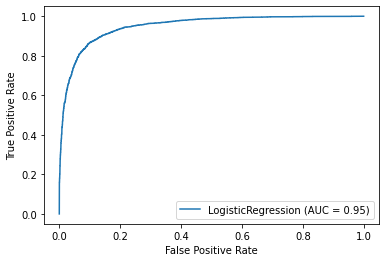

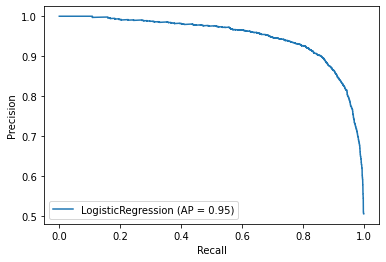

In [85]:
metrics.plot_roc_curve(lr, test_tfidf_out, y_test)

metrics.plot_precision_recall_curve(lr, test_tfidf_out, y_test);

# Whats next?

### Keep Learning:
The most important thing to do it keep learning!
- [Intro to Python Part 2](https://www.eventbrite.com/e/intro-to-python-part-2-live-online-tickets-127409317699)
- [Data Science Prep Course](https://bit.ly/DSIPREP-32q7lQj) 


See all upcoming Galvanize online events [here](https://www.hackreactor.com/webinars)

### More challenge ideas:
- Find new datasets to try and apply NLP
- Try using NLP to create features for a regression model
- Can you find any relationships between positive reviews and the product price?

### Stay Connected:
- Linkedin: [https://www.linkedin.com/in/andrewmeans/](https://www.linkedin.com/in/andrewmeans/)

- email: andrew.means@galvanize.com

Additional Exercise:

Try the preprocessing steps above on the dataset below.

In [ ]:
# Pet Supply Reviews from Amazon provided by Stanford
!wget http://snap.stanford.edu/data/amazon/Pet_Supplies.txt.gz

--2020-12-08 01:12:33--  http://snap.stanford.edu/data/amazon/Pet_Supplies.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49313367 (47M) [application/x-gzip]
Saving to: ‘Pet_Supplies.txt.gz’

Pet_Supplies.txt.gz 100%[===================>]  47.03M  7.48MB/s    in 5.2s    

2020-12-08 01:12:38 (9.08 MB/s) - ‘Pet_Supplies.txt.gz’ saved [49313367/49313367]



In [ ]:
# Also required for the parser
!pip install simplejson

     |████████████████████████████████| 133kB 8.7MB/s 


In [ ]:
# The following code was provided on the original dataset website

import gzip
import simplejson

def parse(filename):
  f = gzip.open(filename, 'rt')
  entry = {}
  for l in f:
    l = l.strip()
    l = str(l)
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry

In [ ]:
review_rows = [e for e in parse("Pet_Supplies.txt.gz")]

In [ ]:
review_df = pd.DataFrame.from_records(review_rows)

In [ ]:
review_df.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000O1CRYW,Orbee Tuff Ball Orange - SMALL,6.95,A2FEQ9XL6ML51C,Just an everyday Dad,1/1,5.0,1286064000,"Little Ball, for Little Dogs...","Great Toy, hard to find! We get ours online he..."
1,B000O1CRYW,Orbee Tuff Ball Orange - SMALL,6.95,A183LI95B2WNUQ,"V. J. Mcmillen ""vmcmillen""",1/1,5.0,1230249600,glow ball,I have bought several of these small Orbee Tuf...
2,B000O1CRYW,Orbee Tuff Ball Orange - SMALL,6.95,A1LSSENM0XIQQR,gcoronado4,0/0,3.0,1309046400,Too Big,It is a quality ball but the small is still to...
3,B000O1CRYW,Orbee Tuff Ball Orange - SMALL,6.95,A2E5PZE1PZVK38,jerry,0/0,5.0,1308873600,no good,I gave it 5 stars because my little dog had so...
4,B0002ARHAE,Kent Marine Pro-Clear Freshwater Clarifier,3.73,A3PXLJE4OPIQTY,"M. Thomas ""sea_anemone""",0/0,5.0,1356912000,Best clarifier ever,I've used many products to try and help the wa...


In [ ]:
# Download the vader sentiment analyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
for i in range(5):
  print(review_df['review/text'][i])
  print(vader.polarity_scores(review_df['review/text'][i]))
  print()

Great Toy, hard to find! We get ours online here or shipped from a friend in America!Our little Papillion-Yorkie mix loves it. Every night I am in the back garden kicking the ball for him! He destroys tennis balls by chewing off the fluff and our wee dog finds them to big to carry/catch. We stumbled across this in our local petstore and our dog was hooked! Sadly, local pet store no longer imports them.Stars all around for this one!
{'neg': 0.108, 'neu': 0.764, 'pos': 0.128, 'compound': 0.5999}

I have bought several of these small Orbee Tuff balls, because my dog simple loves them! The orange ball does glow in the dark that makes it easy to find. I have nothing but good things to say about these small balls. The only down side is Trix, my dog, keeps loosing them!
{'neg': 0.056, 'neu': 0.857, 'pos': 0.087, 'compound': 0.1962}

It is a quality ball but the small is still too big and heavy for my little yorkie to play with comfortably.
{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 

In [ ]:
first_500 = review_df['review/text'][0:500].apply(vader.polarity_scores)[0:500]

In [ ]:
plt.bar(review_df['review/score'][0:500], [x.get('pos') for x in first_500]);